# Cats vs Dogs
<img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/3362/media/woof_meow.jpg" width="350" height="240"/>

Distinguishing a picture of a cat from a picture of a dog is easy for humans to do. However, a computer has much more trouble with this task. Instead of trying to explicitly write logic to identify cats and dogs, let's see how we can use logistic regression to allow our machine to **learn** how to tell the two apart.

#### Review: Unsupervised vs Supervised Learning
*   Supervised learning uses existing inputs and outputs to create a mapping function from inputs to outputs
  * Can be used for regression problems, where outputs are continuous, or classification problems, where out
*   Unsupervised learning finds relationships and clusters in input data

#### Review: Logistic Regression
*   Example of supervised learning applied to a classification problem
*   Simple classification algorithm that maps inputs to discrete output classes
*   Remember, 0 is the negative class and 1 is the positive class.

We use the hypothesis function:

$$z = w^{T}x + b$$

$${h(x)} = a = sigmoid(z)$$

To make an output prediction for each training example, representing the probability of the training example to be of the positive class, 1. We use the following loss function to calculate how accurate our prediction is:

$$Loss = L(y , a) = -ylog(a) - (1 - y)log(1 - a)$$

Then, we apply gradient descent to optimize our weights.

#### Some of the things you will learn
* General architecture of a learning algorithm
* initializing parameters
* doing forward propagation
* calculating the cost function
* doing back propagation with gradient descent

#### Instructions
1. You will write your code between 
```python 
### START CODE HERE ###
```
```python 
### END CODE HERE ###
```

2. Do not use any loops unless explicitly told to do so

## Packages
First let's import some libraries
* [numpy](http://www.numpy.org/) is used for scientific computing
* [matplotlib](https://matplotlib.org/) is used for plotting data
* [pytables](http://www.pytables.org/) is used to read in our data
* [PIL](https://pillow.readthedocs.io/en/latest/) (also known as Pillow) is used for working with images

In [4]:
import numpy as np
import matplotlib.pyplot as plt
!pip install tables
import tables
from PIL import Image

## **Data**

The data set, "data.h5", contains:

*   a training set of m_train images labeled as cat (y=0) or dog (y=1)
*   a test set of m_test images labeled as cat or dog
*   each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).


We will be using this data to create an image recognition algorithm to classify images as cat or dog. Let's load the data.

* * *
### ** Importing Data**
After running this cell you will be asked to choose a file to upload. Navigate to where you cloned the repository and upload the `data.h5` file. This will probably take a minute or so to finish uploading.

In [5]:
from google.colab import files

data = files.upload()
def keys(hf):
    return [key for key in hf.keys()]
with open("data.h5", 'wb', 1) as f:
    f.write(data[keys(data)[0]])

Saving data (1).h5 to data (1) (1).h5


In [0]:
for fn in keys(data):
  f = tables.open_file(fn, mode='r')
  
  x_train = f.root.train_inputs[()]
  y_train = f.root.train_targets[()]
  x_test = f.root.test_inputs[()]
  y_test = f.root.test_targets[()]

  y_train = np.asarray(y_train).reshape(1,275)
  y_test = np.asarray(y_test).reshape(1, 49)
  f.close()

## **Exercise**

Now we need to set the dimensions of our matrices. Find the values for:

* m_train (number of training examples)
* m_test (number of testing examples)
* num_px (dimensions of each image)

Hint: x_train is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access m_train by writing:


```python
 x_train.shape[0]
```

Using this information, write lines to access m_test and num_px. (Remember, we defined x_train, y_train, x_test, and y_test, all of which you can use.)

In [9]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = x_train.shape[0]
m_test = x_test.shape[0]
num_px = x_train.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: m_train = 275
Number of testing examples: m_test = 49
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
x_train shape: (275, 64, 64, 3)
y_train shape: (1, 275)
x_test shape: (49, 64, 64, 3)
y_test shape: (1, 49)


**Expected Output**

Expected Output for m_train, m_test and num_px:

* **m_train:**	225
* **m_test:**	25
* **num_px:**	64


## **Exercise**
For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1).

After this, our training (and test) dataset is a numpy-array where each column represents a "flattened" image.

There should be m_train (respectively m_test) columns.

**Task: ** Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px $*$ num_px $*$ 3, 1).

Hint: The following command flattens a matrix of shape (a, b, c, d) to a matrix of shape (b $*$ c $*$ d, a):



```python
X_flatten = X.reshape(X.shape[0], -1).T 
```



In [10]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)

x_train_flatten = x_train.reshape(x_train.shape[0], -1).T
x_test_flatten = x_test.reshape(x_test.shape[0], -1).T

### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(x_train_flatten.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x_flatten shape: " + str(x_test_flatten.shape))
print ("test_set_y shape: " + str(y_test.shape))
print ("sanity check after reshaping: " + str(x_train_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 275)
train_set_y shape: (1, 275)
test_set_x_flatten shape: (12288, 49)
test_set_y shape: (1, 49)
sanity check after reshaping: [104.  60.  25. 103.  59.]


In [2]:
x_train_flatten /= 255.
x_test_flatten /= 255.

NameError: ignored

Expected Output:

* **x_train_flatten shape:**	(12288, 225)
* **y_train_flatten shape:**	(1, 225)
* **x_test_flatten shape:**	(12288, 25)
* **y_test_flatten shape:**	(1, 25)
* **sanity check after reshaping:**	[137. 98. 59. 146. 107.]

## **Architecture of the Learning Algorithm**

Now it's time to get started on the learning algorithm itself! You will build a logistic regression algorithm.


**Mathematical algorithm:**

Given $x$ which is 1 training example of size (height $*$ width $*$ 3 , 1), 

$$z = w^{T}x + b$$

$${h(x)} = a = sigmoid(z)$$

$$Loss = L(y , a) = -ylog(a) - (1 - y)log(1 - a)$$

Then to calculate the cost over all m training samples,

$$Cost = J = \frac{1}{m}\sum _{i = 1}^{m} L(y^{i}, a^{i})$$


The superscript $^{T}$ just means transpose. What this algorithm is doing is calculating the model predictions for each training sample, and then finding the average loss over all the samples where loss is a measure of how far off the predictions are from the correct labels.

**Next steps are:**


1.   Define model structure
2.   Initialize parameters
3.   Implement gradient descent: calculate loss, gradient, and update parameters.




### Helper Functions

Implement a ** sigmoid function**. Remember from **slide 24** that we need a sigmoid function in order to implement our hypothesis function since it ouputs a number between 0 and 1. Here's a reminder of what sigmoid looks like:
$$ \frac{1}{1 + e^{-x}} $$
Hint: you can use `np.exp()` for *e*

In [0]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [12]:
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(10) = " + str(sigmoid(9.2)))
print("sigmoid(-10) = " + str('%f' % sigmoid(-10)))

sigmoid(0) = 0.5
sigmoid(10) = 0.9998989708060922
sigmoid(-10) = 0.000045


Expected Output:

* **sigmoid(0) =** 0.5
* **sigmoid(10) =** 0.9998989708060922
* **sigmoid(-10) =** 0.000045

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png" width="350" height="240"/>

As you can see, the more negative the input to sigmoid, the closer the output is to 0 and the more positive the input, the closer the output is to 1. Becuase of this, we want our model to learn a representation that passes large positive numbers to sigmoid if the picture is a dog, and large negative numbers if the picture is a cat.

### Initializing Parameters

We need a function that inputs a matrix size, and then creates a weight matrix and a bias that are initialized to zero.

Hint: `np.zeros(shape=(x,y))` returns a numpy array of zeros of shape (x,y)

In [0]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 2 line of code)
    w = np.zeros(shape=(dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [13]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


### Forward Propagation

Now it's time to use our helper functions to implement forward propagation. During forward propagation we will compute the model predictions, the cost over all of our samples and the gradients for the weights and bias. Here are the steps we will need to take:

1. use the equation $w^{T}X + b$ to compute $Z$ *(the capital $X$ means that it is a matrix containing all of our $x^{i}$ samples)*
2. use our sigmoid helper function to compute our predictions $A$
3. use the cost function described earlier to compute our cost $J$
4. compute the gradients using the equations given below

As a reminder our cost function is $J = \frac{1}{m}\sum -Ylog(A) - (1 - Y)log(1 - A)$

**Gradients:**


$$db = \frac{\partial J}{\partial b} = \frac{1}{m}\sum A - Y$$
$$$$
$$dw = \frac{\partial J}{\partial w} = \frac{1}{m}X(A - Y)^{T}$$

If you have taken multivariable calculus then these equations are the partial derivatives of our cost function $J$ with respect to our weights $w$ and our bias $b$. By taking their negatives we can optimize our cost function in the direction of steepest descent. If the last two scentences made no sense then fear not. You can simply implement these equations without fully understanding them. Just know that using these equations we can reduce our cost and move closer to a loss of 0 (i.e. a correct prediction).
$$$$

Hint: 
* you can use `np.dot()` to multiply two matrices together
* you can use `np.sum()` to take the sum of all the elements in a matrix

In [0]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    Z = np.dot(w.T, X) + b # computer linear output
    A = sigmoid(Z)  # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [17]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


Expected Output:
* **dw = ** [[ 0.99993216] [ 1.99980262]]
* **db = **  0.499935230625
* **cost = ** 6.000064773192205

### Backpropagation

Now we want to use the gradients that we computed earlier to perform back propagation. Back propagation is process we use to update our weights bias by a small amount so that our model gets a little better better at making predictions. Here are the equations in case you forgot:

$$w = w - \alpha * dw$$
$$w = b - \alpha * db$$

$\alpha$ is our learning rate, which is often a small number like .01 or .001. If you remember from the slides, we want to update our weights and bias without overshooting the minimum for our cost function. The picture below illustrates this.

<img src="https://storage.googleapis.com/aibootcamp/Week%201/assets/divergence.jpg" width="350" height="240"/>

In [0]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 cat, 1 if dog), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1 line of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [19]:

params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


Expected Output:
* **w = ** [[ 0.1124579 ] [ 0.23106775]]
* **b = ** 1.55930492484
* **dw = ** [[ 0.90158428] [ 1.76250842]]
* **db = ** 0.430462071679

### Predictions

Once we have trained our model, we need a way to use it. For that we will create a function called predict that will take an input of training samples, a weight matrix, and a bias and then output predictions of 0 for cat or 1 for dog. Below, A refers to the Activation function, which is used to scale our inputs from 0 to 1.

**Steps:**
1. compute $\hat{Y} = A = \sigma(w^{T}X + b)$
2. convert those predictions to a 0 if the activation is <= 0.5 and a 1 if it is  > 0.5

Hint: If X is an array of numbers, X > 1 will return a boolean of array where every element is true if the element in X is > 1 and false otherwise. To convert a numpy array `arr` of one type to a numpy array of int type you can use `arr.astype('uint8')`

In [0]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    

    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [19]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


### Model

Now that we all the peices of logistic regression, lets put all together into one function. 

Implement the model function. Use the following notation:

* `Y_prediction` for your predictions on the test set
* `Y_prediction_train` for your predictions on the train set
* `w`, `costs`, `grads` for the outputs of optimize()

In [0]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.01, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [22]:
d = model(x_train_flatten, y_train, x_test_flatten, y_test, num_iterations = 2200, learning_rate = 0.003, print_cost = True)

Cost after iteration 0: 0.693147


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan
Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan
Cost after iteration 1800: nan
Cost after iteration 1900: nan
Cost after iteration 2000: nan
Cost after iteration 2100: nan
train accuracy: 100.0 %
test accuracy: 69.38775510204081 %


Expected Output:
* **train accuracy: **100.0%
* **test accuracy: ** 71.42857142857143 %

As you can see, the training accuracy is 100%, which means that predictions for training images are correct every time. However, our test accuracy is closer to 70%, which means that predictions for images our model has not been trained on will be correct only about 70% of the time. This is called overfitting, which is when the model becomes so good at making predictions for the training dataset that it cannot generalize to data it has never seen before. There are better models that keep this from happening but that's for another time.

Here is an image our model wrongly identified:

1.   List item
2.   List item



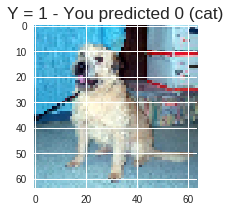

In [22]:
index = 19
plt.figure(figsize = (3, 3))
plt.imshow(x_test[index])
plt.title("Y = " + str(y_test[0,index]) + " - You predicted " + str(int(d["Y_prediction_test"][0, index])) + (" (cat)" if int(d["Y_prediction_test"][0, index]) == 0 else " (dog)"), size='x-large')
plt.show()

Let's see how our cost changed during training

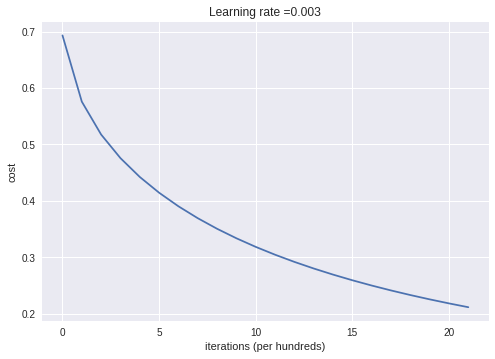

In [23]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

As we would expect, the cost is decreasing and converging to 0. These means that our model is learning a representation of our data. If we wanted to, we could keep training our model to get a cost closer to 0. However, all this would do is increase the amount of overfitting in our model, which would cause the test accuracy to decrease. In machine learning we always have to keep in mind the trade-offs between training longer for better accuracy vs. overfitting our model.

## Things to try on your own

1. Try changing the learning rate to see how a larger or smaller learning rate affects training
2. Change the number of iterations for training